In [46]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os 
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average, Dense
from keras.losses import categorical_crossentropy
from keras.models import Sequential, Model, Input
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from keras import metrics
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from typing import Tuple, List
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot
from keras.layers import LSTM 
%matplotlib inline

In [47]:
path = '//Users//joannakang//Documents//Python_study'

In [48]:
file_path = os.path.join(path, 'complete_data.csv')

In [49]:
train_df = pd.read_csv(file_path)

In [50]:
train_df.head()

,datetime,kWh,pressure,temperature,wind_direction,wind_speed
0,01/01/2017 00:00,NaN,30.19,46.0,230.0,10.0
1,01/01/2017 00:30,2310.732265,30.19,45.0,230.0,7.0
2,01/01/2017 01:00,2289.332265,30.16,45.0,230.0,6.0
3,01/01/2017 01:30,2314.583265,30.16,45.0,240.0,7.0
4,01/01/2017 02:00,2309.308265,30.13,45.0,240.0,10.0


In [51]:
train_df.describe()

,kWh,pressure,temperature,wind_direction,wind_speed
count,35663.000000,35461.000000,35461.000000,32322.000000,35444.000000
mean,3127.624874,29.975828,54.892332,205.191975,9.908786
std,542.645349,0.304220,11.141161,86.619524,4.910225
min,0.000000,28.690000,23.000000,10.000000,0.000000
25%,2710.540000,29.810000,46.000000,130.000000,6.000000
50%,2958.093000,30.010000,54.000000,230.000000,9.000000
75%,3535.946893,30.160000,63.000000,260.000000,13.000000
max,5065.526000,30.810000,93.000000,360.000000,40.000000


In [52]:
train_df = train_df.dropna()

In [53]:
train_df.describe()

,kWh,pressure,temperature,wind_direction,wind_speed
count,32321.000000,32321.000000,32321.000000,32321.000000,32321.000000
mean,3129.973153,29.964390,54.884781,205.191207,10.515238
std,542.315668,0.303748,10.999908,86.620754,4.663697
min,0.000000,28.690000,23.000000,10.000000,1.000000
25%,2713.501000,29.810000,46.000000,130.000000,7.000000
50%,2961.844265,29.980000,54.000000,230.000000,9.000000
75%,3542.062000,30.160000,63.000000,260.000000,14.000000
max,5065.526000,30.810000,93.000000,360.000000,40.000000


In [54]:
train_df = train_df[['kWh', 'pressure', 'temperature', 'wind_speed']]

In [55]:
train_df.head()

,kWh,pressure,temperature,wind_speed
1,2310.732265,30.19,45.0,7.0
2,2289.332265,30.16,45.0,6.0
3,2314.583265,30.16,45.0,7.0
4,2309.308265,30.13,45.0,10.0
5,2315.057265,30.13,45.0,9.0


In [56]:
x_train = train_df[0:25000]

In [57]:
x_train.head()

,kWh,pressure,temperature,wind_speed
1,2310.732265,30.19,45.0,7.0
2,2289.332265,30.16,45.0,6.0
3,2314.583265,30.16,45.0,7.0
4,2309.308265,30.13,45.0,10.0
5,2315.057265,30.13,45.0,9.0


In [58]:
x_train.describe()

,kWh,pressure,temperature,wind_speed
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,3145.010731,29.948553,54.449360,10.770100
std,549.458296,0.304424,11.147893,4.779748
min,0.000000,28.690000,23.000000,1.000000
25%,2721.602008,29.780000,46.000000,7.000000
50%,2972.679202,29.980000,54.000000,10.000000
75%,3577.916000,30.160000,63.000000,14.000000
max,4863.532957,30.660000,88.000000,40.000000


In [65]:
x_train = train_df[['pressure', 'temperature', 'wind_speed']][0:25000]
y_train = train_df['kWh'][0:25000]

In [66]:
y_train.head()

1    2310.732265
2    2289.332265
3    2314.583265
4    2309.308265
5    2315.057265
Name: kWh, dtype: float64

In [67]:
x_train.head()

,pressure,temperature,wind_speed
1,30.19,45.0,7.0
2,30.16,45.0,6.0
3,30.16,45.0,7.0
4,30.13,45.0,10.0
5,30.13,45.0,9.0


In [68]:
x_val = train_df[['pressure', 'temperature', 'wind_speed']][25000:30000]
y_val = train_df['kWh'][25000:30000]

In [98]:
def deep_learning_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(4, activation="relu", input_shape=(x_size,)))
    t_model.add(BatchNormalization())
    t_model.add(Dense(4, activation="relu"))
    t_model.add(BatchNormalization())
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=0.0), metrics=['accuracy'])
    return(t_model)

In [99]:
model = deep_learning_model_1(x_train.shape[1],1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 16        
_________________________________________________________________
batch_normalization_5 (Batch (None, 4)                 16        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
batch_normalization_6 (Batch (None, 4)                 16        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 73
Trainable params: 57
Non-trainable params: 16
_________________________________________________________________
None


In [100]:
# def deep_learning_model_1(x_size, y_size): -> 파라미터를 정의
#     t_model = Sequential()
#     t_model.add(Dense(10, activation="relu", input_shape=(x_size,))) -> 컬럼의 갯수 (몇개의 데이터를 넣었는지)
#     t_model.add(BatchNormalization())
#     t_model.add(Dense(7, activation="relu"))
#     t_model.add(BatchNormalization())
#     t_model.add(Dense(7, activation="relu"))
#     t_model.add(Dense(y_size)) -> 예측값
#     print(t_model.summary())
#     t_model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=0.0), metrics=['accuracy'])
#     return(t_model)

In [101]:
print(x_train.shape[0])

25000


In [102]:
epochs = 30
batch_size = 1000

print('Epochs: ', epochs)
print('Batch_size: ', batch_size)

Epochs:  30
Batch_size:  1000


In [103]:
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=1, validation_data = (x_val, y_val))

Train on 25000 samples, validate on 5000 samples
Epoch 1/30
25000/25000 [==============================] - 1s 29us/step - loss: 10192747.4400 - acc: 0.0000e+00 - val_loss: 9925836.6000 - val_acc: 0.0000e+00
Epoch 2/30
25000/25000 [==============================] - 0s 3us/step - loss: 10192310.0400 - acc: 0.0000e+00 - val_loss: 9924997.4000 - val_acc: 0.0000e+00
Epoch 3/30
25000/25000 [==============================] - 0s 3us/step - loss: 10191818.9200 - acc: 0.0000e+00 - val_loss: 9924216.4000 - val_acc: 0.0000e+00
Epoch 4/30
25000/25000 [==============================] - 0s 3us/step - loss: 10191258.5200 - acc: 0.0000e+00 - val_loss: 9923702.6000 - val_acc: 0.0000e+00
Epoch 5/30
25000/25000 [==============================] - 0s 3us/step - loss: 10190621.0400 - acc: 0.0000e+00 - val_loss: 9923189.0000 - val_acc: 0.0000e+00
Epoch 6/30
25000/25000 [==============================] - 0s 3us/step - loss: 10189904.3600 - acc: 0.0000e+00 - val_loss: 9922762.8000 - val_acc: 0.0000e+00
Epoch 7/

In [104]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

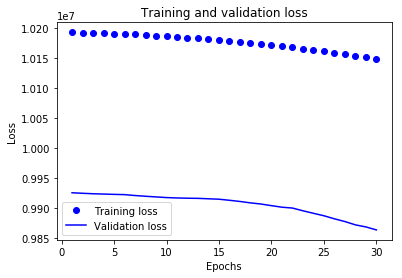

In [105]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()